In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

from __future__ import division

In [2]:
smartphones = pd.read_csv('E:\Data Analytics\Data Science Projects\Smartphones\Smartphones.csv')

In [3]:
smartphones.head()

,Model,Brand,Price,RAM,ROM,Battery Capacity,Screen Size(Inch),SIM Type,System On Chip,Number Of Rear Cameras,Rear Camera(In Mega Pixel),Front Camera,Operating System,Rating
0,Redmi Note 7 Pro,Xiaomi,"13,999",4,64,4000,6.3,Dual Sim,Snapdragon 675,2,48.0,13,Android v9.0 (Pie),4.6
1,Redmi Note 7 Pro,Xiaomi,"16,999",6,128,4000,6.3,Dual Sim,Snapdragon 675,2,48.0,13,Android v9.0 (Pie),4.6
2,Redmi Note 7S,Xiaomi,"10,999",3,32,4000,6.3,Dual Sim,Snapdragon 660,2,48.0,13,Android v9.0 (Pie),4.6
3,Redmi Note 7S,Xiaomi,"12,999",4,64,4000,6.3,Dual Sim,Snapdragon 660,2,48.0,13,Android v9.0 (Pie),4.5
4,Redmi Note 7,Xiaomi,"9,999",3,32,4000,6.3,Dual Sim,Snapdragon 660,2,12.0,13,Android v9.0 (Pie),4.5


In [4]:
smartphones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 14 columns):
Model                         273 non-null object
Brand                         273 non-null object
Price                         273 non-null object
RAM                           273 non-null int64
ROM                           273 non-null int64
Battery Capacity              273 non-null int64
Screen Size(Inch)             273 non-null float64
SIM Type                      273 non-null object
System On Chip                273 non-null object
Number Of Rear Cameras        273 non-null int64
Rear Camera(In Mega Pixel)    273 non-null float64
Front Camera                  273 non-null int64
Operating System              273 non-null object
Rating                        269 non-null float64
dtypes: float64(3), int64(5), object(6)
memory usage: 29.9+ KB


In [5]:
#Group the smartphones based on the brand 
brands_group = smartphones.groupby('Brand')

#Find the count of mobiles released by each brand
brands_group = brands_group.size().reset_index('Brand')
brands_group.columns = ['Brand','Smartphones Released']
brands_group.head()

,Brand,Smartphones Released
0,Apple,9
1,Asus,10
2,Blackberry,3
3,Coolpad,4
4,Google,6


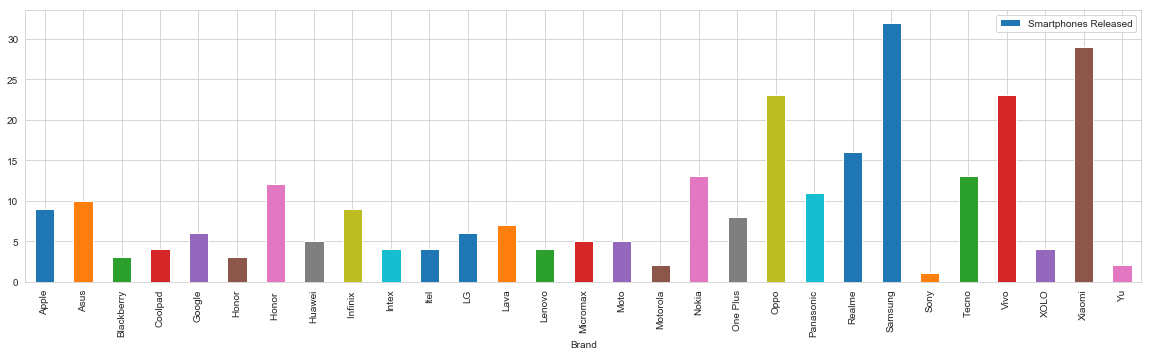

In [6]:
#Which Brand has released the most number of smartphones
brands_group.plot.bar(y = 'Smartphones Released',x = 'Brand',figsize = (20,5))

In [7]:
#Find the data type of each attribute
smartphones.dtypes

Model                          object
Brand                          object
Price                          object
RAM                             int64
ROM                             int64
Battery Capacity                int64
Screen Size(Inch)             float64
SIM Type                       object
System On Chip                 object
Number Of Rear Cameras          int64
Rear Camera(In Mega Pixel)    float64
Front Camera                    int64
Operating System               object
Rating                        float64
dtype: object

In [8]:
#Price is of Object datatype. Convert it to integer
smartphones['Price'] = smartphones.Price.str.replace(',','').astype(long)
smartphones.dtypes

Model                          object
Brand                          object
Price                           int64
RAM                             int64
ROM                             int64
Battery Capacity                int64
Screen Size(Inch)             float64
SIM Type                       object
System On Chip                 object
Number Of Rear Cameras          int64
Rear Camera(In Mega Pixel)    float64
Front Camera                    int64
Operating System               object
Rating                        float64
dtype: object

In [9]:
#Find the max price and minimum price of the smartphones
print('Max Price: \n')
print(smartphones[['Model','Brand','Price']][smartphones.Price == smartphones.Price.max()])
print('\n')
print('Min Price: \n')
print(smartphones[['Model','Brand','Price']][smartphones.Price == smartphones.Price.min()])

Max Price: 

             Model  Brand   Price
174  iPhone XS Max  Apple  134000
175      iPhone XS  Apple  134000


Min Price: 

        Model     Brand  Price
238  Spark Go  Micromax   3499


In [10]:
smartphones.head()

,Model,Brand,Price,RAM,ROM,Battery Capacity,Screen Size(Inch),SIM Type,System On Chip,Number Of Rear Cameras,Rear Camera(In Mega Pixel),Front Camera,Operating System,Rating
0,Redmi Note 7 Pro,Xiaomi,13999,4,64,4000,6.3,Dual Sim,Snapdragon 675,2,48.0,13,Android v9.0 (Pie),4.6
1,Redmi Note 7 Pro,Xiaomi,16999,6,128,4000,6.3,Dual Sim,Snapdragon 675,2,48.0,13,Android v9.0 (Pie),4.6
2,Redmi Note 7S,Xiaomi,10999,3,32,4000,6.3,Dual Sim,Snapdragon 660,2,48.0,13,Android v9.0 (Pie),4.6
3,Redmi Note 7S,Xiaomi,12999,4,64,4000,6.3,Dual Sim,Snapdragon 660,2,48.0,13,Android v9.0 (Pie),4.5
4,Redmi Note 7,Xiaomi,9999,3,32,4000,6.3,Dual Sim,Snapdragon 660,2,12.0,13,Android v9.0 (Pie),4.5


In [11]:
#Find the Highest Priced Smartphone in Each Brand
max_price = smartphones.groupby(['Brand'])['Price'].transform(max) == smartphones['Price']
max_price = smartphones[max_price]
max_price.head()

,Model,Brand,Price,RAM,ROM,Battery Capacity,Screen Size(Inch),SIM Type,System On Chip,Number Of Rear Cameras,Rear Camera(In Mega Pixel),Front Camera,Operating System,Rating
14,Black Shark 2,Xiaomi,49999,12,256,4000,6.39,Dual Sim,Snapdragon 855,2,48.0,20,Android v9.0 (Pie),NaN
38,Galaxy S10 Plus,Samsung,117900,12,1024,4100,6.40,Dual Sim,Exynos 9820,2,16.0,10,Android v9.0 (Pie),4.0
59,Realme 3 Pro,Realme,16999,6,128,4045,6.30,Dual Sim,Snapdragon 710,2,16.0,25,Android v9.0 (Pie),4.5
93,NEX,Vivo,39990,8,128,4000,6.59,Dual Sim,Snapdragon 845,2,12.0,8,Android v8.1 (Oreo),4.2
114,Find X,Oppo,58990,8,256,3730,6.40,Dual Sim,Snapdragon 845,2,20.0,25,Android v8.1 (Oreo),4.6


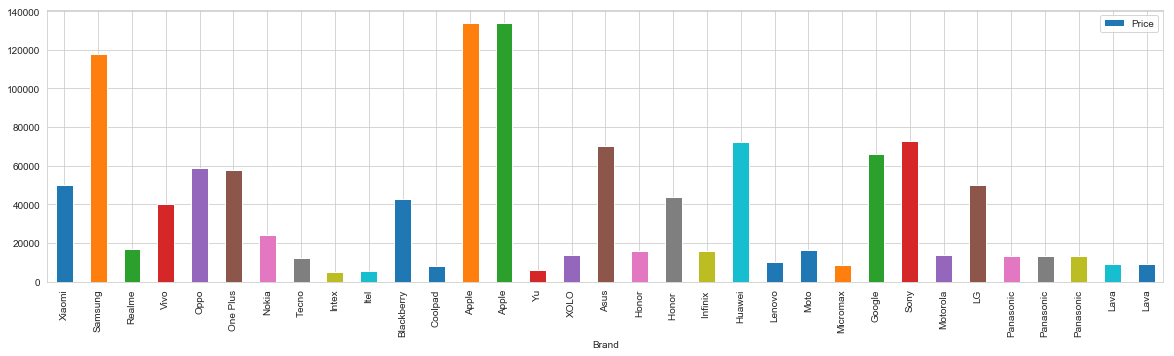

In [12]:
#Max Price of Each Brands

max_price.plot.bar(y = 'Price',x = 'Brand',figsize = (20,5))

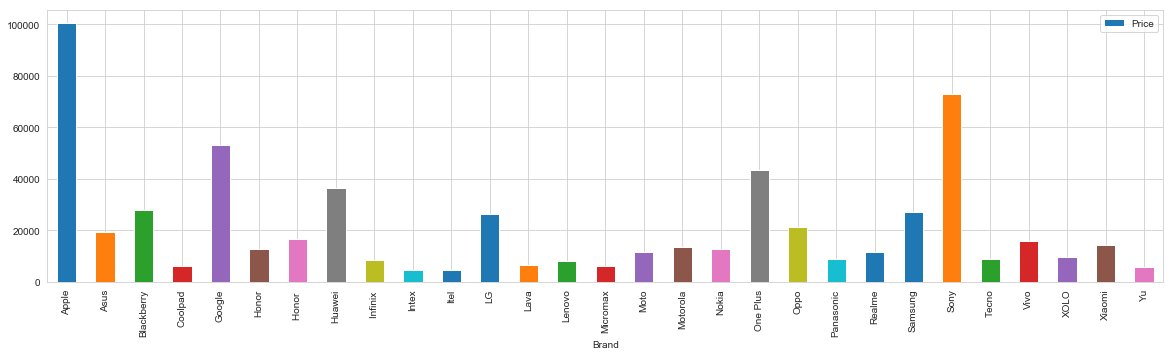

In [13]:
#Find the average price of each brands

averagePrice = pd.Series(smartphones.groupby('Brand')['Price'].mean())

average_price = averagePrice.to_frame()

average_price.plot.bar(y = 'Price',figsize = (20,5))

Text(0,0.5,'Number Of Smartphones')

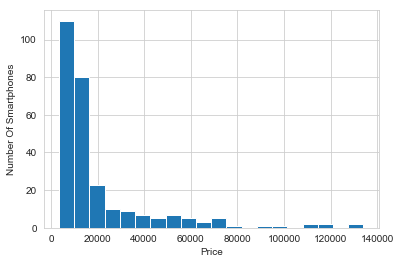

In [19]:
#We will make a histogram of prices

plt.hist(smartphones.Price,bins = 20)

#labels
plt.xlabel('Price')
plt.ylabel('Number Of Smartphones')

Text(0,0.5,'Price')

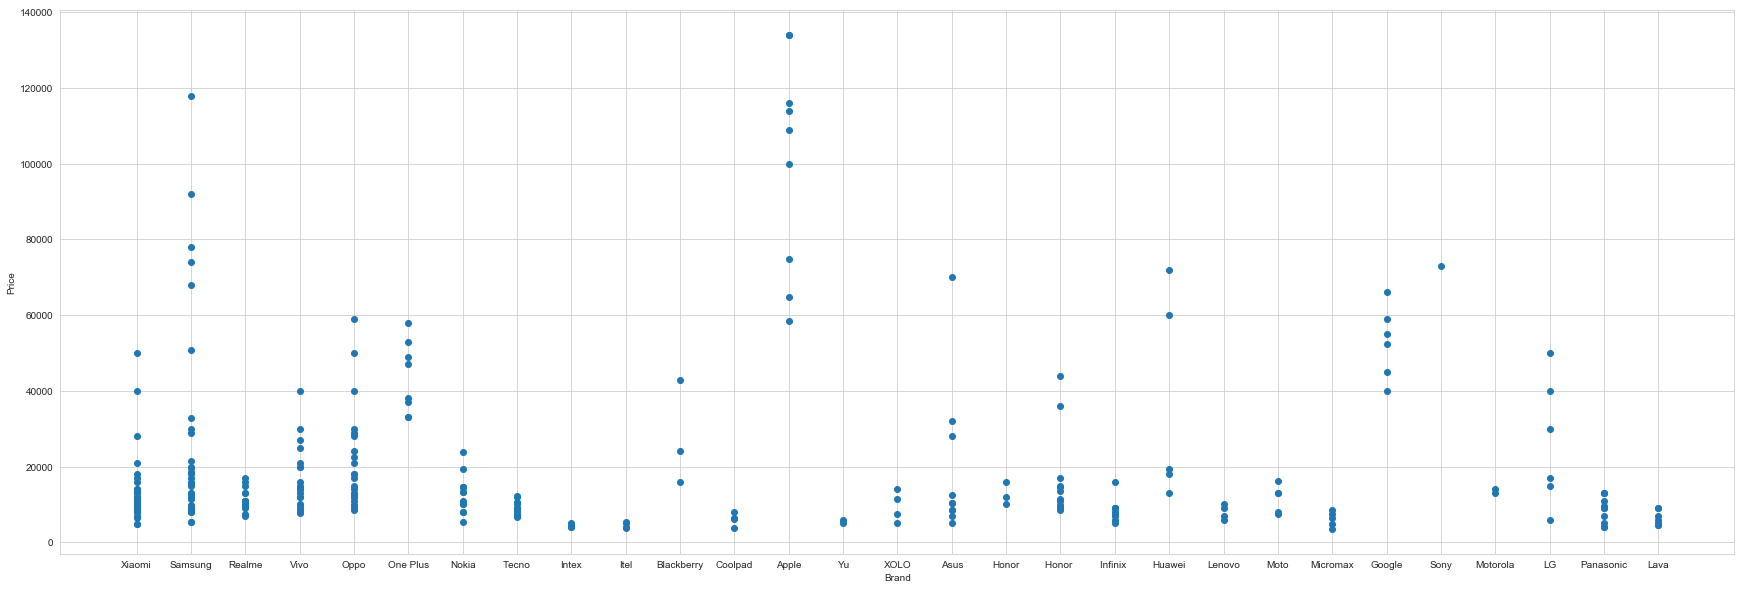

In [35]:
#Scatter plot of smartphones prices and Brand
plt.figure(figsize=(30,10))
plt.scatter(smartphones.Brand,smartphones.Price)

#label
plt.xlabel('Brand')
plt.ylabel('Price')

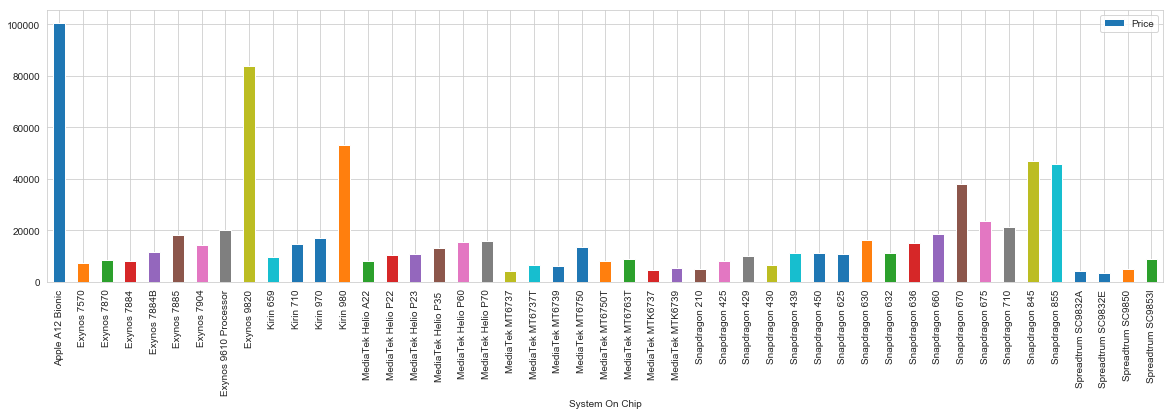

In [33]:
#Average price based on the processor
avgSOCPrice = pd.Series(smartphones.groupby('System On Chip')['Price'].mean())

avg_SoCPrice = avgSOCPrice.to_frame()

avg_SoCPrice.plot.bar(y = 'Price',figsize = (20,5))

Text(0,0.5,'Price')

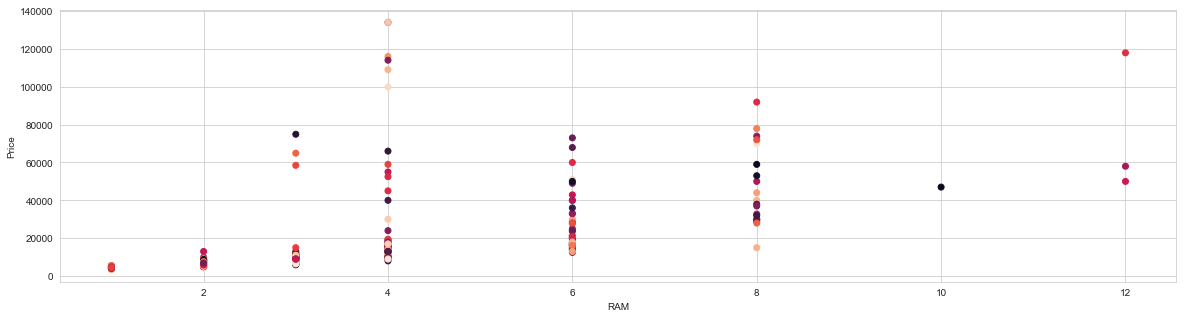

In [46]:
#Price of smartphone based on RAM
plt.figure(figsize = (20,5))
colors = np.random.rand(273)
plt.scatter(smartphones.RAM,smartphones.Price,c=colors)

#label
plt.xlabel('RAM')
plt.ylabel('Price')

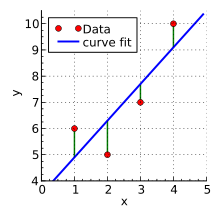

In [53]:
# Quick display of image form wikipedia
from IPython.display import Image
url = 'http://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Linear_least_squares_example2.svg/220px-Linear_least_squares_example2.svg.png'
Image(url)

In [74]:
#Univariate Linear Regression

#setup X as Brand
X = smartphones.Brand

#Use V to make x-two dimensional
X = np.vstack([X, np.ones(len(X))]).T

#setup Y as smartphones prices
Y = smartphones.Price

X

array([['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Xiaomi', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
       ['Samsung', 1.0],
 

In [76]:
#Get the value of slope and the constant
m, b = np.linalg.lstsq(X, Y)[0]

ValueError: could not convert string to float: Lava

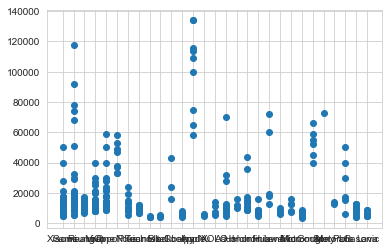

In [60]:
plt.plot(smartphones.Brand,smartphones.Price,'o')